# Modeling Single Subject Data

Today we will learn how to build and estimate a single subject first-level model in Dartbrains and will cover the following topics:
- Building a design matrix
- Modeling noise in the GLM with nuisance variables
- Estimating GLM 
- Performing basic contrasts

## Dataset
We will work with one participant's data from my dataset. 

In this study, I am interested in looking at the activation of the basal forebrain during a Monetary Incentive Delay Task (MID). This visual task encompasses a cue which informs the participant of the **probabilities and magnitudes of outcomes**, a stimulus to which they must respond as quickly as they can, and feedback that informs them of the outcome of their trial. 

I altered this task by making it a block design so I could **contrast blocks of high consequences (i.e. large rewards and losses) to blocks of low consequences (i.e. small rewards and losses)**.

## Creating Onset Files

First, we will learn the basics of how to build a design matrix for our GLM. Before we get started, we need to make onset files.

## Building a Design Matrix

Now, let's load all of the python modules we will need to complete this tutorial.

In [1]:
%matplotlib inline

import pandas as pd
import requests

requirements = requests.get('https://raw.githubusercontent.com/ljchang/dartbrains/master/requirements.txt').text
requirements = [x for x in requirements.split('\n')][3:-1]

for r in requirements:
    !pip install {r}

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 15.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 49.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 38.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.6/136.6 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 53.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 25.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 31.5 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 17.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 53.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 MB 8.6 MB/s eta 0:00:00:00:0100:01
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86837 sha256=eabfc20f876a894af988e1e31baea09aa62c63629bdf8812731a1fd9a88fca64
  Stored in directory: /root/.cache/pip/wheels/21/f2/19/1a2188bbd4d883770e2f9cfbc85c43264db0f7dea416e3cd93
Successfully built umap-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 17.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 16.0 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 5.9 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.3/622.3 kB 3.8 MB/s eta 0:00:00a 0:00:01
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=338eb347ef5f3789dda03b1ce576c3a09f0906e7b76d2b2d1923ae2c72c1e007
  Stored in directory: /root/.cache/pip/wheels/ca/cc/e3/f1e272f628fdb013d969acc99cfe2e031ea15b3efb74ffe842
Successfully built docopt
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.4.0
    Uninstalling typing_extensions-4.4.0:
      Successfully uninstalled typing_extensions-4.4.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 M

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.8/99.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.7/84.7 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.6/120.6 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.0/93.0 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 12.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 9.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 11.2 MB/s eta 0:00:00


In [2]:
pip install pybids

Note: you may need to restart the kernel to use updated packages.


In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import nibabel as nib
from nltools.file_reader import onsets_to_dm
from nltools.stats import regress, zscore
from nltools.data import Brain_Data, Design_Matrix
from nltools.stats import find_spikes 
from nilearn.plotting import view_img, glass_brain, plot_stat_map
from bids import BIDSLayout, BIDSValidator
from nilearn.image import load_img
from nilearn.image import binarize_img
from nilearn.image import resample_to_img
import scipy.stats as stats
import requests

## Setting the Directory

Before you set the directory, make sure the folder is exactly in the format:

**data/** should contain:

* bids/

* dataset_description.json

**bids/** should contain:

* derivatives/

* sub-001/

* sub-002/
...

**derivatives/** should contain:

* dataset_description.json

**subject folders** should contain:

* **func/** folder that contains:

    * events.tsv file (onset file)

In [4]:
data_dir = '/data/MID_Dartbrains/data/bids/'
layout = BIDSLayout(data_dir, derivatives=True)
layout

/opt/miniconda-latest/envs/neuro_py36/lib/python3.8/site-packages/bids/layout/validation.py:124: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


BIDS Layout: .../data/MID_Dartbrains/data/bids | Subjects: 68 | Sessions: 0 | Runs: 4

# To build the design matrix, we need the onset and duration for each condition of the task.

To build the design matrix, we will be using the Design_Matrix class from the nltools toolbox. First, we use pandas to load the text file that contains the onset and duration for each condition of the task. Rows reflect measurements in time sampled at 1/tr cycles per second. Columns reflect distinct conditions. Conditions are either on or off. We then cast this Pandas DataFrame as a Design_Matrix object. Be sure to specify the sampling frequency, which is 1/tr.

In [5]:
# Function to create design matrix
def load_bids_events(layout, subject):
    '''Create a design_matrix instance from BIDS event file'''
    
    tr = layout.get_tr(task='MID')
    n_tr = nib.load(layout.get(subject=subject, task='MID', scope='raw', suffix='bold', extension='nii.gz')[0].path).shape[-1]
    
    onsets = pd.read_csv(layout.get(subject=subject, suffix='events')[0].path, sep='\t')
    onsets.columns = ['Onset', 'Duration', 'Stim']
    return onsets_to_dm(onsets, sampling_freq=1/tr, run_length=n_tr)

In [6]:
# Check onset file
onsets = pd.read_csv(layout.get(subject='004', suffix='events')[0].path, sep='\t')
onsets

,onset,duration,trial_type
0,8.503228,27.918173,Small
1,59.334393,57.586068,Big
2,119.633575,55.985435,Small
3,196.677615,30.136187,Small
4,229.338259,61.324013,Big
5,312.723030,30.027748,Big
6,343.770551,59.599716,Small
7,405.052841,18.037244,Big


In [7]:
# Load in the subject name, making sure it's the values after "sub-"
dm = load_bids_events(layout, '004')
dm.info()

<class 'nltools.data.design_matrix.Design_Matrix'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Small   296 non-null    float64
 1   Big     296 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


# Plot each regressor's time course

<AxesSubplot: >

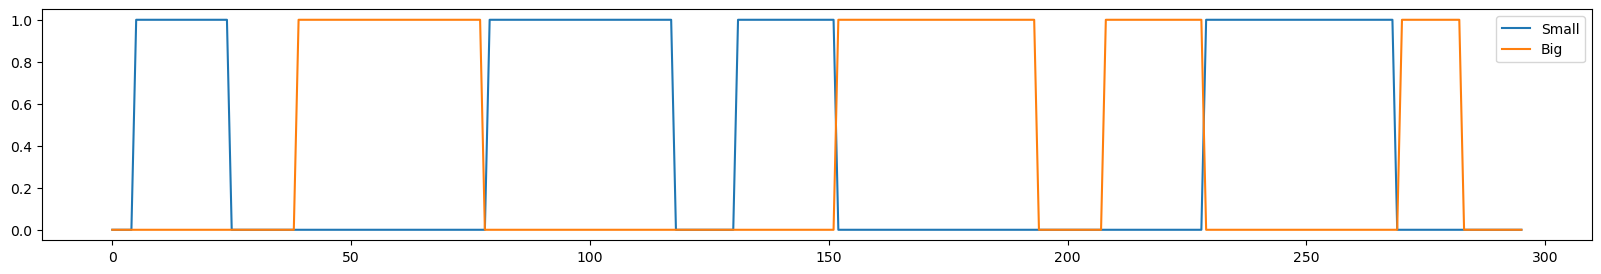

In [8]:
f,a = plt.subplots(figsize=(20,3))
dm.plot(ax=a)

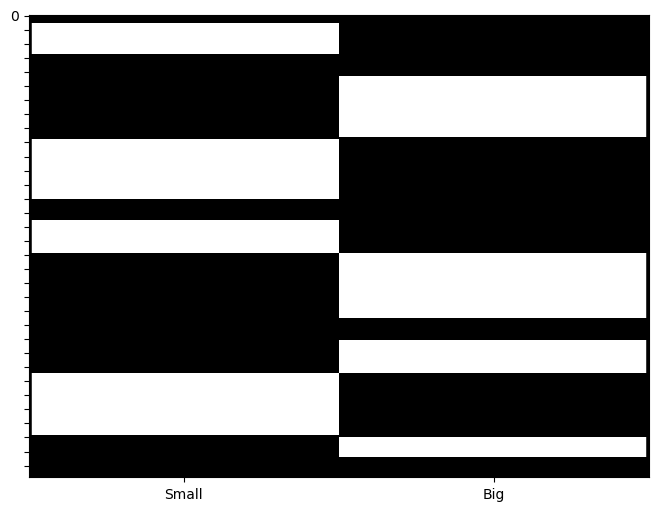

In [9]:
# If you want to see the design matrix visually
dm.heatmap()

In [10]:
# Function to define motion covariates
def make_motion_covariates(mc, tr):
    z_mc = zscore(mc)
    all_mc = pd.concat([z_mc, z_mc**2, z_mc.diff(), z_mc.diff()**2], axis=1)
    all_mc.fillna(value=0, inplace=True)
    return Design_Matrix(all_mc, sampling_freq=1/tr)

## Convolve regressors

We can now convolve all of the onset regressors with an HRF function using the .convolve() method. By default it will convolve all regressors with the standard double gamma HRF function, though you can specify custom ones and also specific regressors to convolve.

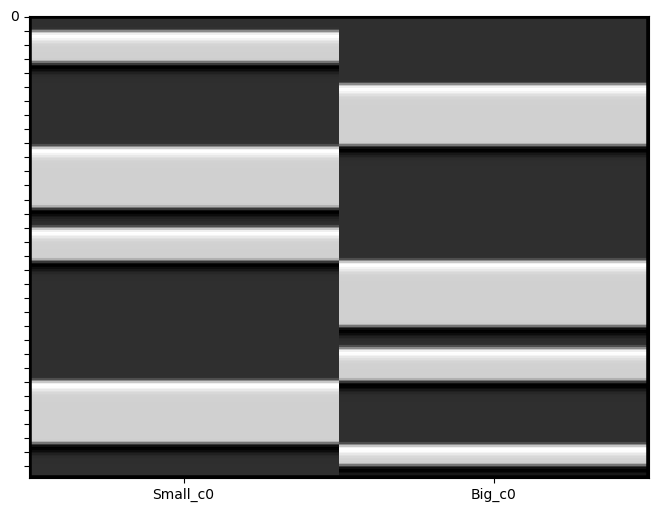

In [11]:
# Add events to design matrix
dm_conv = dm.convolve()
dm_conv.heatmap()

<AxesSubplot: >

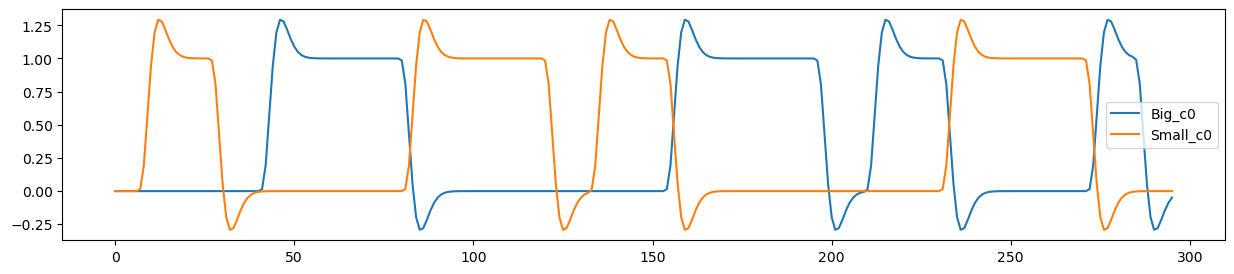

In [13]:
f,a = plt.subplots(figsize=(15,3))
dm_conv[['Big_c0','Small_c0']].plot(ax=a)

# Multicollinearity 

In statistics, collinearity or multicollinearity is when one regressor can be strongly linearly predicted from the others. While this does not actually impact the model’s ability to predict data as a whole, it will impact our ability to accurately attribute variance to a single regressor. Recall that in multiple regression, we are estimating the independent variance from each regressor from X on Y. If there is substantial overlap between the regressors, then the estimator can not attribute the correct amount of variance each regressor accounts for Y and the coefficients can become unstable. 

One way to evaluate multicollinearity is to examine the pairwise correlations between each regressor. We plot the correlation matrix as a heatmap.

<AxesSubplot: >

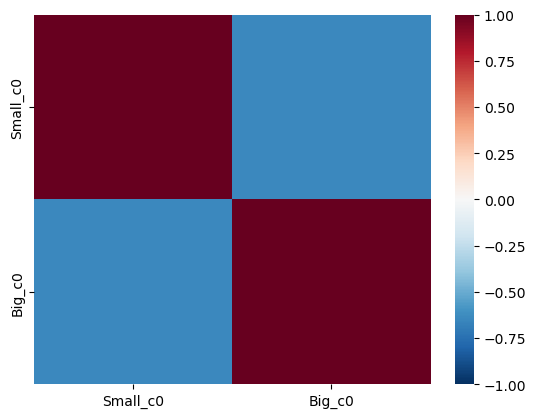

In [14]:
sns.heatmap(dm_conv.corr(), vmin=-1, vmax=1, cmap='RdBu_r')

The variance inflation factor is a metric that can help us detect if one of the regressors can be explained by 3 or more of the remaining regressors. A VIF of 1 indicates there is no correlation but values greater than 4 should be investigated further. 

Text(0, 0.5, 'Variance Inflation Factor')

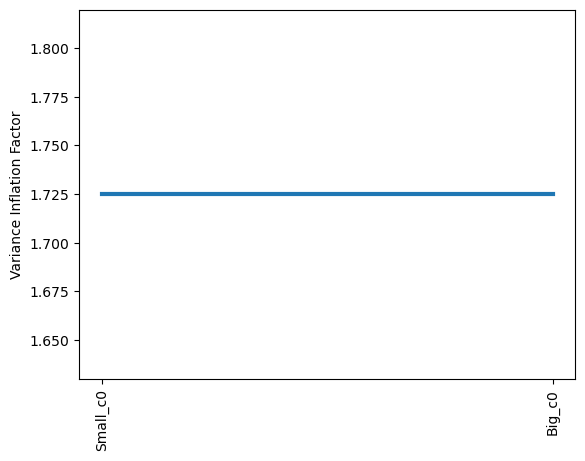

In [15]:
plt.plot(dm_conv.columns, dm_conv.vif(), linewidth=3)
plt.xticks(rotation=90)
plt.ylabel('Variance Inflation Factor')

## Filtering

There are often other types of artifacts in our signal that might take the form of slow or fast oscillations. It is common to apply a high pass filter to the data to remove low frequency artifacts. Often this can also be addressed by simply using a few polynomials to model these types of trends. If we were to directly filter the brain data using something like a butterworth filter as we did in our signal processing tutorial, we would also need to apply it to our design matrix to make sure that we don’t have any low frequency drift in experimental design. One easy way to simultaneously perform both of these procedures is to simply build a filter into the design matrix. We will be using a discrete cosine transform (DCT), which is a basis set of cosine regressors of varying frequencies up to a filter cutoff of a specified number of seconds. Many software use 100s or 128s as a default cutoff, but we encourage caution that the filter cutoff isn’t too short for your specific experimental design. Longer trials will require longer filter cutoffs. 

Here, we use 220 because 

In [17]:
dm_conv_filt = dm_conv.add_dct_basis(duration=220)

<AxesSubplot: >

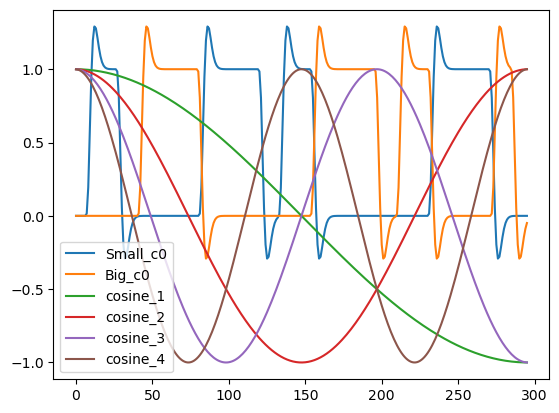

In [18]:
dm_conv_filt.iloc[:,0:].plot()

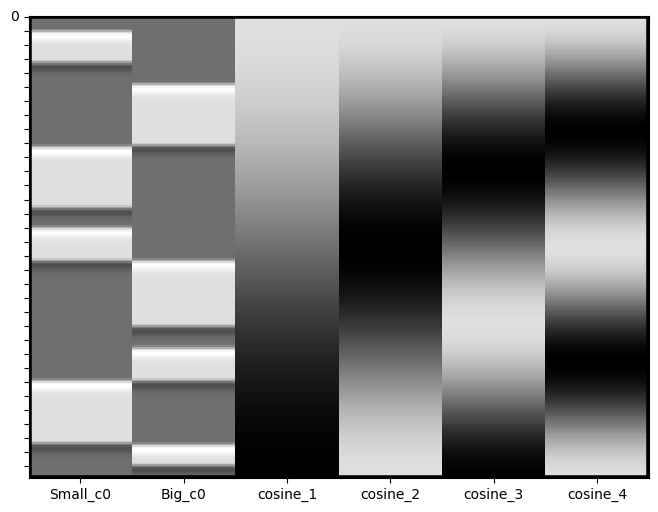

In [19]:
dm_conv_filt.heatmap()

# Intercepts 

We almost always want to include an intercept in our model. This will usually **reflect the baseline, or the average voxel response during the times that are not being modeled as a regressor**. It is important to note that you must have some sparsity to your model, meaning that you can’t model every point in time, as this will make your model rank deficient and unestimable.

If you are concatenating runs and modeling them all together, it is recommended to include a separate intercept for each run, but not for the entire model. This means that the average response within a voxel might differ across runs. You can add an intercept by simply creating a new column of ones (e.g., dm['Intercept] = 1). Here we provide an example using the .add_poly() method, which adds an intercept by default.

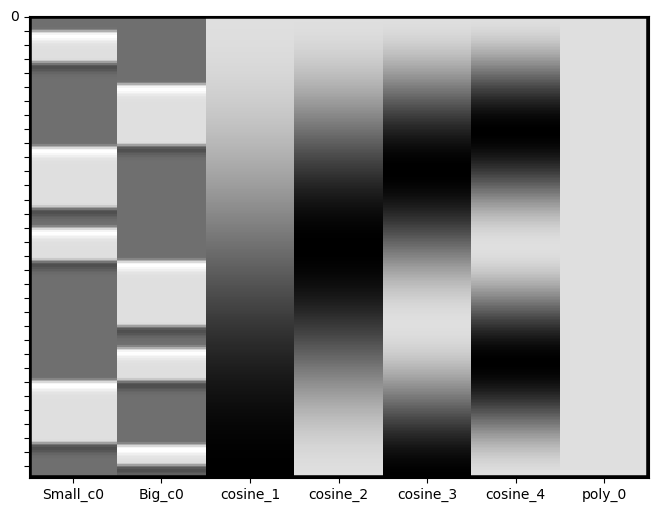

In [20]:
dm_conv_filt_poly = dm_conv_filt.add_poly()
dm_conv_filt_poly.heatmap()

# Linear Trends

We also often want to remove any slow drifts in our data. This might include a linear trend and a quadratic trend. We can also do this with the .add_poly() method and adding all trends up to an order of 2 (e.g., quadratic). We typically use this approach rather than applying a high pass filter when working with naturalistic viewing data. However, here, we removed poly 1 (linear) and poly 2 (quadratic) because they correlate too much with cosine 1 and cosine 2.

# Noise Covariates

Another important thing to consider is removing variance associated with head motion. Remember the preprocessed data has already realigned each TR in space, but head motion itself can nonlinearly distort the magnetic field. There are several common strategies for trying to remove artifacts associated with head motion. One is using a data driven denoising algorithm like ICA and combining it with a classifer such as FSL’s FIX module. Another approach is to include the amount of correction that needed to be applied to align each TR. For example, if someone moved a lot in a single TR, there will be a strong change in their realignment parameters. It is common to include the 6 parameters as covariates in your regression model. However, as we already noted, often motion can have a nonlinear relationship with signal intensity, so it is often good to include other transformations of these signals to capture nonlinear signal changes resulting from head motion. We typically center the six realigment parameters (or zscore) and then additionally add a quadratic version, a derivative, and the square of the derivatives, which becomes 24 additional regressors.

In addition, it is common to model out big changes using a regressor with a single value indicating the timepoint of the movement. This will be zeros along time, with a single value of one at the time point of interest. This effectively removes any variance associated with this single time point. It is important to model each “spike” as a separate regressor as there might be distinct spatial patterns associated with different types of head motions. We strongly recommond against using a single continuous frame displacement metric as is often recommended by the fMRIprep team. This assumes (1) that there is a linear relationship between displacement and voxel activity, and (2) that there is a single spatial generator or pattern associated with frame displacement. As we saw in the ICA noise lab, there might be many different types of head motion artifacts. This procedure of including spikes as nuisance regressors is mathematically equivalent to censoring your data and removing the bad TRs. We think it is important to do this in the context of the GLM as it will also reduce the impact if it happens to covary with your task.

First, let’s load preprocessed data from one participant.

**Note this part of the tutorial gets pretty different from the original Dartbrains tutorial because I don't want the default MNI template and am using my own.**

In [33]:
data_dir = '/data/MID_Dartbrains/data/bids/'
layout = BIDSLayout(data_dir, derivatives=True)
sub = '004'
preprocessed_func = load_img(layout.get(subject=sub, task='MID', scope='derivatives', regex_search=True, space='MIITRA', suffix='bold', extension='nii.gz', return_type='file')[1])

In [34]:
# Load in the mask
mask_img = load_img('/data/ANTs/templates/MIITRA_1/MIITRA_1_BrainExtractionBrain.nii.gz')

#Resample the mask to the same space as the functional image
# Skip - mask_img_resampled = resample_img(mask_img, target_affine=preprocessed_func.affine, interpolation='nearest', target_shape=preprocessed_func.shape[:3])

# Binarize mask
binarized_mask_r = binarize_img(mask_img)

# Save as NIFTI
binarized_mask_r.to_filename('/data/MID_Dartbrains/data/bids/derivatives/fmriprep/sub-004/sub-004_binarized_mask.nii.gz')

/opt/miniconda-latest/envs/neuro_py36/lib/python3.8/site-packages/nilearn/image/image.py:1041: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine)


In [35]:
data = Brain_Data(preprocessed_func, mask = '/data/MID_Dartbrains/data/bids/derivatives/fmriprep/sub-004/sub-004_binarized_mask.nii.gz')

In [36]:
data

nltools.data.brain_data.Brain_Data(data=(296, 1342211), Y=(0, 0), X=(0, 0), mask=sub-004_binarized_mask.nii.gz)

Inspect the realignment parameters - how much each volume had to be moved in the (X,Y,Z) planes and rotations around each axis. Data are the standardized so rotations and translations are on the same scale

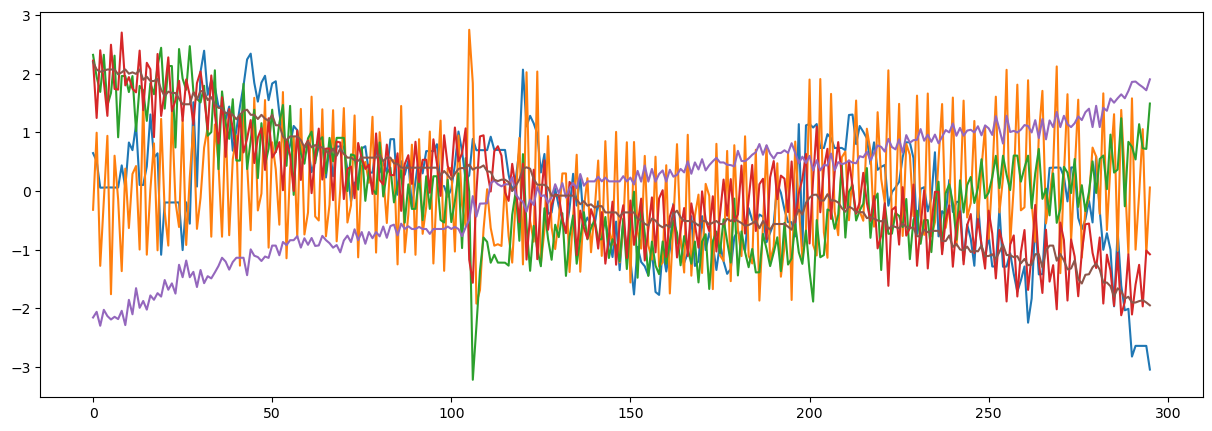

In [45]:
covariates = pd.read_csv(layout.get(subject=sub, scope='derivatives', task='MID', extension='.tsv')[0].path, sep='\t')

mc = covariates[['trans_x','trans_y','trans_z','rot_x', 'rot_y', 'rot_z']]

plt.figure(figsize=(15,5))
plt.plot(zscore(mc))

Build the 24 covariates related motion (6 realignment, quadratic, derivative, square of their derivative)

<AxesSubplot: >

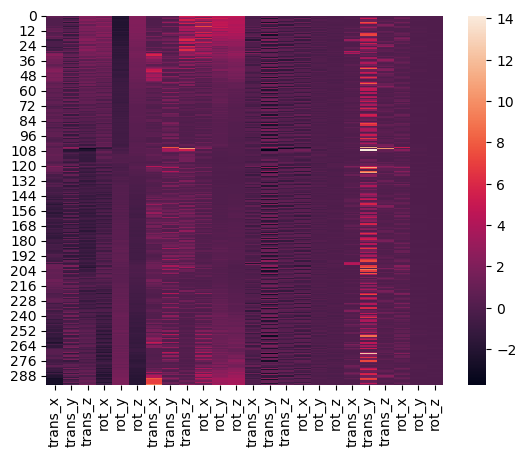

In [47]:
def make_motion_covariates(mc, tr):
    z_mc = zscore(mc)
    all_mc = pd.concat([z_mc, z_mc**2, z_mc.diff(), z_mc.diff()**2], axis=1)
    all_mc.fillna(value=0, inplace=True)
    return Design_Matrix(all_mc, sampling_freq=1/tr)

tr = layout.get_tr()
mc_cov = make_motion_covariates(mc, tr)

sns.heatmap(mc_cov)

# Global signal

Text(0, 0.5, 'Intensity')

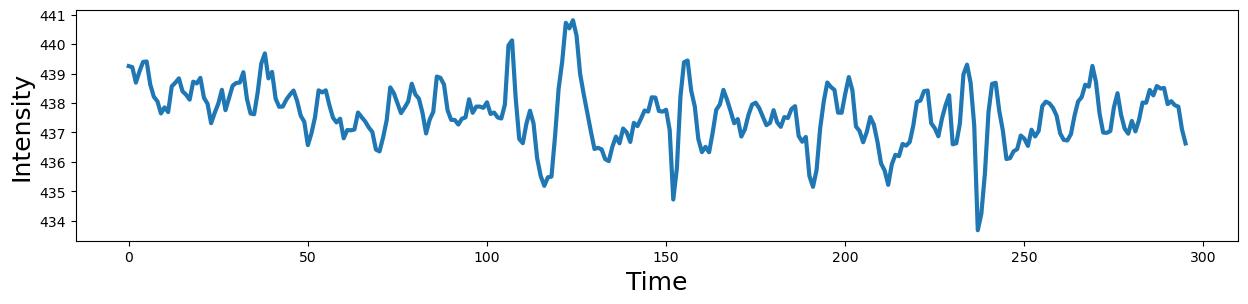

In [48]:
plt.figure(figsize=(15,3))
plt.plot(np.mean(data.data, axis=1), linewidth=3)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Intensity', fontsize=18)

# Spikes

In [52]:
fmriprep_motion_regressors = [i for i in covariates if i.startswith('motion')]
fmriprep_other_regressors = [i for i in covariates if (i=='csf') or (i=='white_matter')]

spikes = covariates[fmriprep_motion_regressors]
others = covariates[fmriprep_other_regressors]

import scipy.stats as stats
spikes['csf_zscore'] = stats.zscore(others['csf'])
spikes['wm_zscore'] = stats.zscore(others['white_matter'])

/tmp/ipykernel_18/3814640567.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spikes['csf_zscore'] = stats.zscore(others['csf'])
/tmp/ipykernel_18/3814640567.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spikes['wm_zscore'] = stats.zscore(others['white_matter'])


<AxesSubplot: >

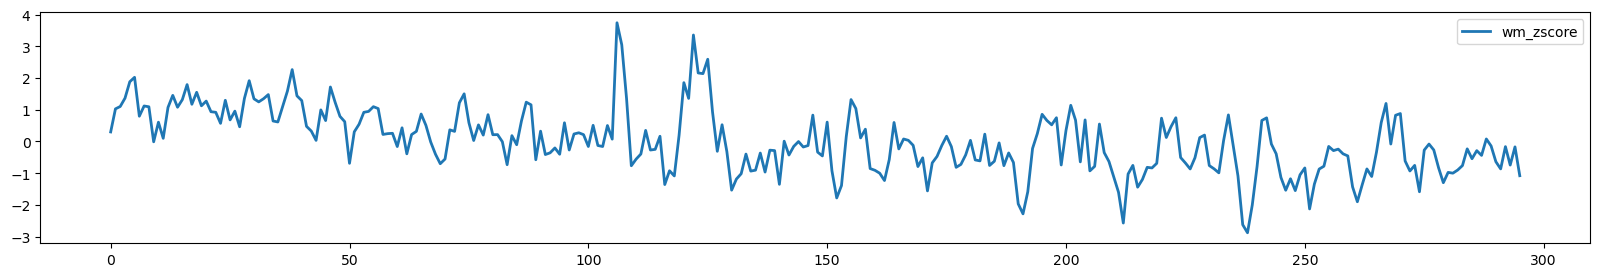

In [53]:
f, a = plt.subplots(figsize=(20,3))
spikes = Design_Matrix(spikes.iloc[:,1:], sampling_freq=1/tr)
spikes.plot(ax = a, linewidth=2)

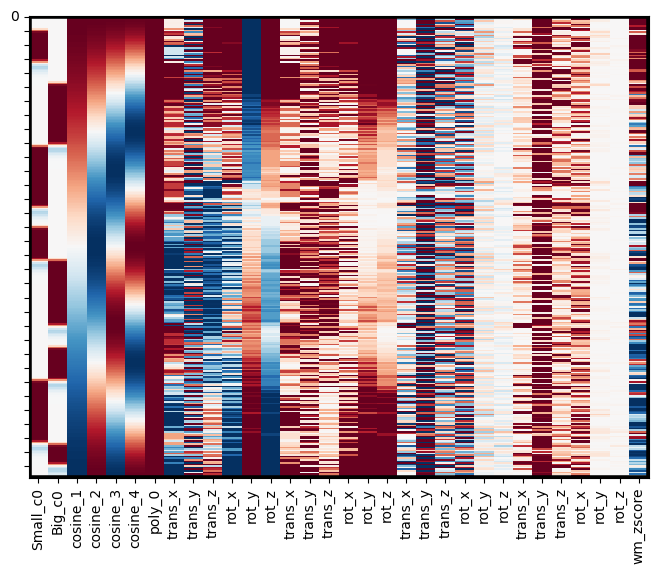

In [54]:
dm_conv_filt_poly_cov = pd.concat([dm_conv_filt_poly, mc_cov, spikes], axis=1)
dm_conv_filt_poly_cov.heatmap(cmap='RdBu_r', vmin=-1,vmax=1)

In [55]:
# picking the width of the gaussian kernel - usually half the size of 2 voxel width
# But we want to differentiate the nucleus accumbens from the BF so might want to reduce the kernel size
fwhm=4
smoothed = data.smooth(fwhm=fwhm)

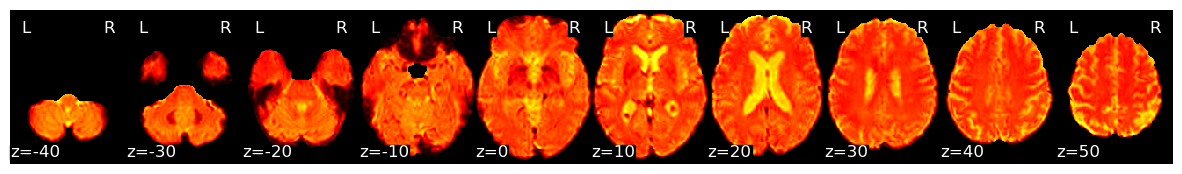

In [56]:
data.mean().plot(anatomical=nib.load('/data/ANTs/templates/MIITRA_1/MIITRA_1_BrainExtractionBrain.nii.gz'))

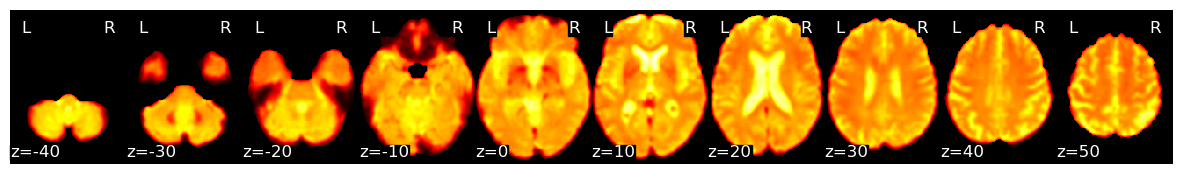

In [57]:
smoothed.mean().plot(anatomical=nib.load('/data/ANTs/templates/MIITRA_1/MIITRA_1_BrainExtractionBrain.nii.gz'))

In [58]:
smoothed.X = dm_conv_filt_poly_cov
stats = smoothed.regress()

print(stats.keys())

dict_keys(['beta', 't', 'p', 'df', 'sigma', 'residual'])


In [59]:
stats['beta'][0].iplot(anatomical=nib.load('/data/ANTs/templates/MIITRA_1/MIITRA_1_BrainExtractionBrain.nii.gz'))

interactive(children=(FloatText(value=0.0, description='Threshold'), HTML(value='Image is 3D', description='Vo…

In [115]:
smoothed.write(f'{sub}_betas_denoised_smoothed{fwhm}_preprocessed_fMRI_bold.nii.gz')

In [116]:
(stats['t']).write(f'{sub}_tstats_denoised_smoothed4_preprocessed_fMRI_bold.nii.gz')

In [117]:
(stats['p']).write(f'{sub}_pvals_denoised_smoothed4_preprocessed_fMRI_bold.nii.gz')

In [118]:
(stats['residual']).write(f'{sub}_residual_denoised_smoothed4_preprocessed_fMRI_bold.nii.gz')